In [161]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
import numpy as np

In [162]:
traj = pd.read_csv("../trajs/square.csv")

In [163]:
# get fname before file extension
def get_trajectory_name(fname):
    return os.path.splitext(fname)[0]

In [164]:
def find_traj_results(fname, files):
    results = []
    for t_fname in f:
        # if this is the quad actually flying this trajectory
        orig_traj_name = get_trajectory_name(t_fname)
        traj_name = orig_traj_name[0:orig_traj_name.find("quad") - 1]
        if traj_name in fname and "quad" in orig_traj_name:
            results.append(orig_traj_name)
    return results

In [165]:
def plot_3d_trajectory(fname, files):
    traj = pd.read_csv("../trajs/" + fname)
    # x is first column
    xvals = traj.iloc[:, 0]
    # y is second column
    yvals = traj.iloc[:, 1]
    zvals = traj.iloc[:, 2]
    fig = plt.figure()
    #fig, ax = plt.subplots()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(yvals, xvals, zvals, label='input trajectory')
    #plt.plot(yvals, xvals, label='input trajectory')

    traj_name = get_trajectory_name(fname)
    results = find_traj_results(traj_name, files)
    for result in results:
        res_traj = pd.read_csv("../trajs/" + result + ".csv")
        # x is first column
        res_xvals = res_traj.iloc[:, 0]
        # y is second column
        res_yvals = res_traj.iloc[:, 1]
        res_zvals = res_traj.iloc[:, 2]
        #fig, ax = plt.subplots()
        ax.plot(res_xvals, res_yvals, res_zvals, label='quadrotor trajectory')
        #plt.plot(res_xvals, res_yvals, label='quadrotor trajectory')
        
    chart_title = traj_name + " Trajectory"
    #ax.set(xlabel='y position (m)', ylabel='x position (m)',
    #       title=chart_title)
    #ax.grid()
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc='lower center', borderaxespad=0.)
    plt.savefig("plots/" + traj_name + ".png", bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [166]:
# pass in a file name
def plot_horizontal_trajectory(fname, files):
    traj = pd.read_csv("../trajs/" + fname)
    # x is first column
    xvals = traj.iloc[:, 0]
    # y is second column
    yvals = traj.iloc[:, 1]
    #fig, ax = plt.subplots()
    #ax.plot(yvals, xvals)
    plt.plot(yvals, xvals, label='input trajectory')

    traj_name = get_trajectory_name(fname)
    results = find_traj_results(traj_name, files)
    #print(results)
    for result in results:
        res_traj = pd.read_csv("../trajs/" + result + ".csv")
        # x is first column
        res_xvals = res_traj.iloc[:, 0]
        # y is second column
        res_yvals = res_traj.iloc[:, 1]
        #fig, ax = plt.subplots()
        #ax.plot(res_xvals, res_yvals, label='quadrotor trajectory')
        plt.plot(res_xvals, res_yvals, label='quadrotor trajectory')
        
    chart_title = traj_name + " Trajectory"
    #ax.set(xlabel='y position (m)', ylabel='x position (m)',
    #       title=chart_title)
    #ax.grid()
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc='lower center', borderaxespad=0.)
    plt.savefig("plots/" + traj_name + ".png", bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

In [167]:
def plot_vertical_trajectory(fname):
    traj = pd.read_csv("../trajs/" + fname)
    # z is 3rd column
    zvals = traj.iloc[:, 2]
    time = np.arange(0,len(zvals))
    fig, ax = plt.subplots()
    ax.plot(time, zvals)

    traj_name = get_trajectory_name(fname)
    chart_title = traj_name + " Trajectory"
    ax.set(xlabel='time', ylabel='z position (m)',
           title=chart_title)
    ax.grid()

    fig.savefig("plots/" + traj_name + ".png")
    plt.show()

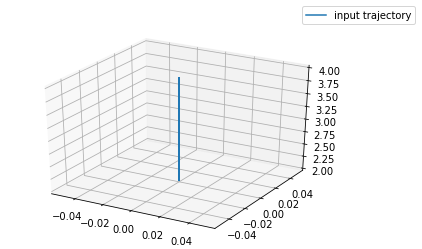

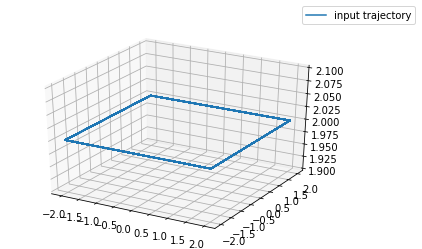

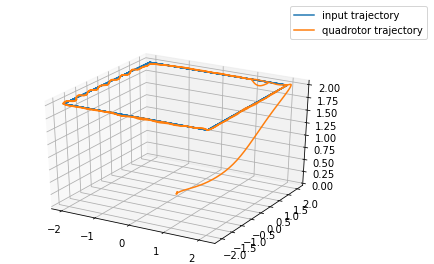

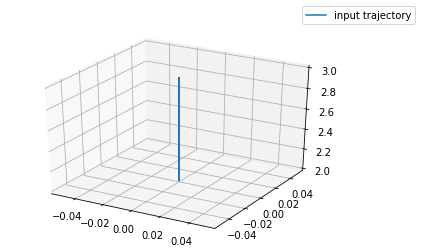

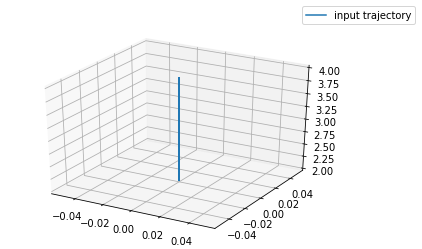

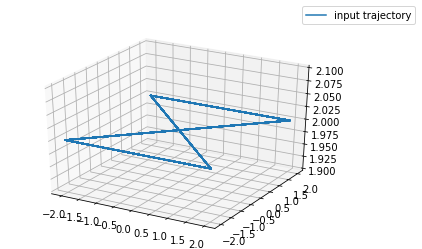

In [168]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk("../trajs"):
    f.extend(filenames)
    break
for fname in f:
    if "updown" in fname and not "quad" in fname:
        #plot_vertical_trajectory(fname)
        plot_3d_trajectory(fname, f)
    elif not "quad" in fname:
        #plot_horizontal_trajectory(fname, f)
        plot_3d_trajectory(fname, f)